<a href="https://colab.research.google.com/github/bhavrish/CVD-Classifer/blob/main/ML/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [37]:
df = pd.read_csv('./Cluster0')
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
1,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
2,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
3,22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1
4,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1


Lets Do Some Feature Engineering: blood_pressure = ap_hi / ap_lo https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189

In [38]:
df['blood_pressure'] = df["ap_hi"] / df["ap_lo"]
df.drop(["ap_hi", "ap_lo"], axis= 1)
df = df[df['blood_pressure'] != math.inf]

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('nonBinaryTransformer', StandardScaler(), ['age', 'height', 'weight', "blood_pressure", 'cholesterol', 'gluc'])
], remainder='passthrough')

scaled_features = ct.fit_transform(df)
print(scaled_features)

[[-0.05928695 -0.77547563  0.38796378 ...  0.          1.
   1.        ]
 [-1.24011186  1.11866411  0.1909375  ...  0.          1.
   1.        ]
 [ 0.79516793 -0.62977258  0.9133672  ...  0.          1.
   0.        ]
 ...
 [ 0.32419784  0.53585188  0.05958665 ...  0.          1.
   1.        ]
 [ 1.01637429 -0.48406952  3.0806563  ...  0.          1.
   1.        ]
 [ 0.9393147   0.24444577 -0.46581677 ...  0.          0.
   1.        ]]


In [40]:
df_feat = df.drop(["cardio", "Unnamed: 0", "id"], axis = 1)

In [41]:
df_feat.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,blood_pressure
0,20228,1,156,85.0,140,90,3,1,0,0,1,1.555556
1,17623,2,169,82.0,150,100,1,1,0,0,1,1.500000
2,22113,1,157,93.0,130,80,3,1,0,0,1,1.625000
3,23046,1,158,90.0,145,85,2,2,0,0,1,1.705882
4,16608,1,170,68.0,150,90,3,1,0,0,1,1.666667


In [42]:
df_targ = df.loc[:, "cardio"]
df_targ

0        1
1        1
2        0
3        1
4        1
        ..
13411    1
13412    1
13413    1
13414    1
13415    1
Name: cardio, Length: 13416, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_targ, test_size = .33, random_state = 0)

In [44]:
print(X_train, y_train)

         age  gender  height  weight  ...  smoke  alco  active  blood_pressure
13271  21967       1     159    80.0  ...      0     0       1        1.750000
6643   20957       1     171    79.0  ...      0     0       1        1.555556
5991   19851       1     163    99.0  ...      0     0       1        1.750000
4351   20418       1     162   100.0  ...      0     0       0        1.444444
10467  21321       1     168    79.0  ...      0     0       1        1.750000
...      ...     ...     ...     ...  ...    ...   ...     ...             ...
13123  20581       1     159    77.0  ...      0     0       0        1.777778
3264   22510       1     161    78.0  ...      0     0       1        1.555556
9845   15623       1     145    60.0  ...      0     0       1        1.666667
10799  23493       1     170    81.0  ...      0     0       1        1.444444
2732   16789       1     170    68.0  ...      0     0       1        1.400000

[8988 rows x 12 columns] 13271    1
6643     1
5991

In [45]:
group = [1, 3, 5, 7, 9, 11, 13, 15, 17,19,21, 23, 25, 27, 29, 31]
accuracies = []

for i in group:
    neigh = KNeighborsClassifier(n_neighbors = i, metric= "manhattan", weights= "uniform")
    neigh.fit(X_train, y_train)  
    print(neigh.score(X_test, y_test))
    accuracies.append(neigh.score(X_test, y_test))
  

0.7134146341463414
0.7678410117434508
0.7877145438121048
0.7956187895212286
0.8012646793134598
0.802393857271906
0.8048780487804879
0.8080397470641373
0.8100722673893406
0.8107497741644083
0.8112014453477868
0.8121047877145439
0.8121047877145439
0.8125564588979223
0.8127822944896116
0.8125564588979223


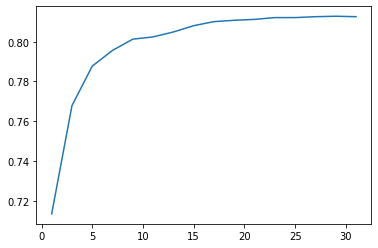

In [46]:
plt.plot(group, accuracies)

In [47]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    "n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17,19,21, 23, 25, 27, 29, 31],
    "metric" : ["euclidean", "manhattan"]
}


In [48]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose= 1, cv =3, n_jobs= -1)


In [49]:
gs_results = gs.fit(X_train, y_train)
predict = gs.predict(X_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [50]:
predict = gs.predict(X_test)

In [51]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 31}

In [52]:
print("Accuracy:", metrics.accuracy_score(y_test, predict))
#print(classification_report(y_test, grid_predictions))

Accuracy: 0.8125564588979223


Try cross validation!

In [53]:
kn = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
scores = cross_validate(kn, df_feat, df_targ, cv = 5, return_train_score= True, return_estimator= True)
scores

{'estimator': [KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29)],
 'fit_time': array([0.03300381, 0.0229733 , 0.01971745, 0.02097034, 0.02042198]),
 'score_time': array([0.12982178, 0.13418818, 0.11851859, 0.13858604, 0.11764669]),
 'test_score': array([0.81110283, 0.81103243, 0.81140514, 0.81103243, 0.81140514]),
 'train_score': array([0.81149832, 0.81160906, 0.81132954, 0.81123637, 0.81123637])}

Cross Validation on another cluster

In [54]:
df1 = pd.read_csv("./Cluster1")
df1.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
1,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
2,17,27,16747,1,158,52.0,110,70,1,3,0,0,1,0
3,29,40,21057,2,169,74.0,130,70,1,3,0,0,0,0
4,53,68,14507,1,165,77.0,135,90,3,3,0,0,1,1


In [55]:
df1['blood_pressure'] = df1["ap_hi"] / df1["ap_lo"]
df1.drop(["ap_hi", "ap_lo"], axis= 1)
df1 = df1[df1['blood_pressure'] != math.inf]
df1.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure
0,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1.500000
1,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1.444444
2,17,27,16747,1,158,52.0,110,70,1,3,0,0,1,0,1.571429
3,29,40,21057,2,169,74.0,130,70,1,3,0,0,0,0,1.857143
4,53,68,14507,1,165,77.0,135,90,3,3,0,0,1,1,1.500000


In [56]:
df1_targ = df1.loc[:, "cardio"]
df1_targ.head()

0    0
1    1
2    0
3    0
4    1
Name: cardio, dtype: int64

In [57]:
df1_feat = df1.drop("cardio", axis = 1)
df1_feat.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,blood_pressure
0,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,1.500000
1,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1.444444
2,17,27,16747,1,158,52.0,110,70,1,3,0,0,1,1.571429
3,29,40,21057,2,169,74.0,130,70,1,3,0,0,0,1.857143
4,53,68,14507,1,165,77.0,135,90,3,3,0,0,1,1.500000


In [58]:
kn = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
scores = cross_validate(kn, df1_feat, df1_targ, cv = 5, return_train_score= True, return_estimator= True)
scores

{'estimator': [KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29)],
 'fit_time': array([0.01419067, 0.01156902, 0.01022172, 0.01010895, 0.00992012]),
 'score_time': array([0.04784155, 0.05923533, 0.05048084, 0.05428624, 0.04789495]),
 'test_score': array([0.6092437 , 0.52773109, 0.51680672, 0.54499579, 0.62489487]),
 'train_score': array([0.64417823, 0.64459857, 0.65279529, 0.64719479, 0.6480353 ])}

In [59]:
kn = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
scores = cross_validate(kn, df1_feat, df1_targ, cv = 5, scoring = "f1", return_train_score= True, return_estimator= True)
scores

{'estimator': [KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29)],
 'fit_time': array([0.01252866, 0.01025701, 0.00987148, 0.00994396, 0.01023769]),
 'score_time': array([0.05208898, 0.05133295, 0.0509541 , 0.06559539, 0.05982614]),
 'test_score': array([0.74094708, 0.61294766, 0.59132907, 0.63957362, 0.76915114]),
 'train_score': array([0.7650895 , 0.76477952, 0.76869224, 0.76683794, 0.76655052])}

Find Accuracy for all clusters

In [60]:
grid_params

{'metric': ['euclidean', 'manhattan'],
 'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

In [61]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose= 1, cv =3, n_jobs= -1)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'metric': 'manhattan', 'n_neighbors': 31}

In [63]:
Clusters = ["Cluster0", "Cluster1", "Cluster2", "Cluster3", "Cluster4", "Cluster5"]
knx = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
accuracyDict = {}
numEstimatorsDict = {}

for clust in Clusters:
    # Preprocessing
    path_k = "./" + clust
    df = pd.read_csv(path_k, delimiter=',')
    df['blood_pressure'] = df["ap_hi"] / df["ap_lo"]
    df.drop(["ap_hi", "ap_lo"], axis= 1)
    df = df[df['blood_pressure'] != math.inf]
    df_targ = df.loc[:, "cardio"]
    df_feat = df.drop("cardio", axis = 1)
    
    # Train model
    X_train, X_test, y_train, y_test = train_test_split(df_feat, df_targ, test_size = .33, random_state = 0)
    gs = GridSearchCV(knx, grid_params, verbose= 1, cv =3, n_jobs= -1)
    gs.fit(X_train, y_train)
    knx = KNeighborsClassifier(n_neighbors= gs.best_params_['n_neighbors'], metric= gs.best_params_['metric'])
    knx.fit(X_train, y_train)
    
    # Store accuracies
    y_pred = knx.predict(X_test)
    accuracyDict[clust] = metrics.accuracy_score(y_test, y_pred)

    # Store best # of estimtators
    numEstimatorsDict[clust] = gs.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [64]:
print(accuracyDict)
print(numEstimatorsDict)

{'Cluster0': 0.8125564588979223, 'Cluster1': 0.60825267447784, 'Cluster2': 0.5347280334728034, 'Cluster3': 0.5174721189591078, 'Cluster4': 0.5765525722484116, 'Cluster5': 0.6701897942948062}
{'Cluster0': {'metric': 'euclidean', 'n_neighbors': 23}, 'Cluster1': {'metric': 'manhattan', 'n_neighbors': 27}, 'Cluster2': {'metric': 'euclidean', 'n_neighbors': 23}, 'Cluster3': {'metric': 'euclidean', 'n_neighbors': 19}, 'Cluster4': {'metric': 'manhattan', 'n_neighbors': 29}, 'Cluster5': {'metric': 'manhattan', 'n_neighbors': 31}}
